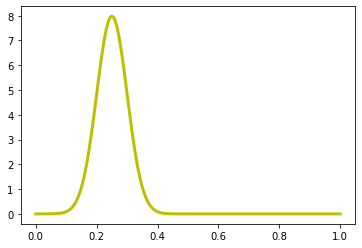

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math 
from cmath import phase
mu, sigma = 0.25, 0.05
s = np.random.normal(mu, sigma, 1000)
bins = np.linspace(0, 1, 1000)
# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
plt.show()

# Этап 1
## Создание сетки и проверка работы графиков.
В качестве основы была взята сетка в 1000 узлов(j - номер узла) с шагом 0.001(eps), таким образом здесь мы обозначили, что работаем с коробкой с L = 1. Зададим также альтернативную сетку для времени с шагом с дельта(delta) и номером узла(n). Сразу объявим изначальные приближения, рекомендованые авторами модели, то есть параметр lyambda = 1, откуда выбирается размер шага по времени, также здесь задается размер барьера V = 2(50*pi*); параметр k0=50*pi*, задающий скорость движения нашего Гауссового пучка.  

### Стартовое состояние:

0.0 0.0 0.0 0.0 0.0
0.3678794411714426 0.3678794411714426 0.00012340980408667953


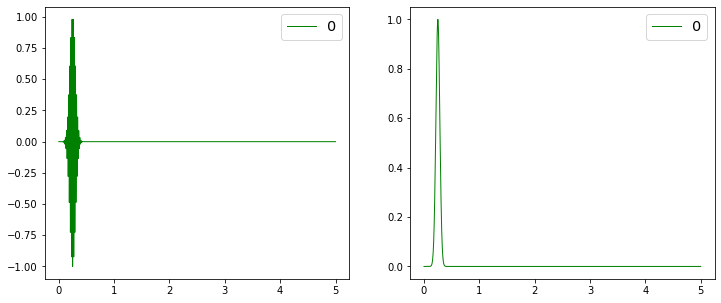

In [44]:
J = 5000
eps = 0.001
lyambda = 1
delta = 2 * eps ** 2/lyambda
k0 = 100*np.pi
V = np.zeros(J)
x = np.linspace(0, 5, J)
psi = np.linspace(0, 5, J, dtype = np.complex128)
module_psi = np.linspace(0, 5, J)
#задаём форму барьера 
for j in range(J):
    if j*eps >= 2.2 and j*eps <= 2.8:
        V[j] = 2*(50*np.pi) ** 2
print(V[200], V[499], V[500], V[599], V[601])
#барьер на узлах 500 ~ 600
for j in range(J):
    x[j] = j*eps
    psi[j] = (np.exp(k0*1j*x[j])*np.exp( - (x[j] - mu)**2 / (2 * sigma**2)))
    module_psi[j] = abs(psi[j]) ** 2
    if j == 0 or j == J - 1:
        psi[j] = 0
print(module_psi[200], module_psi[300], module_psi[400])
l = 0
fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5) )
ax1.plot(x, psi.real, linewidth=1, color='green', label = l )
ax1.legend(loc = 1, fontsize = "x-large")
ax2.plot(x, module_psi, linewidth=1, color='green', label = l)
ax2.legend(loc = 1, fontsize = "x-large")
plt.show()

In [45]:
print(delta)

2e-06


In [ ]:
fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5) )
ax1.plot(x, psi.real, linewidth=1, color='green', label = l )
ax1.legend(loc = 1, fontsize = "x-large")
ax2.plot(x, module_psi, linewidth=1, color='green', label = l)
ax2.legend(loc = 1, fontsize = "x-large")

Наше итерационное уравнение задано в неявном виде, поэтому необходимо было ввести дополнительные функции. Для этого были введены, функции e и f, которые являются массивами, размером J(1000). Аналогично с функцией omega, которая является массивом на J(граничные условия - нули, а сами элементы массива формируются из 3 точек сетки j-1, j, j+1 элементов соотвественно, поэтому на концах омега будет зависет только от двух составляющих - j и j+1). Фунция e - не меняется в зависимости от итераций, так как зависит только от величины барьера, размера сетки и величины временных итераций, поэтому её можно определить отдельно от основного цикла.

значение вф в точкe 2500 0j
значение вф в точкe 500 (4.1464917302913635e-06-7.454418395126523e-07j)
значение вф в точкe 100 (0.010134074927236222-0.0019410591881855383j)


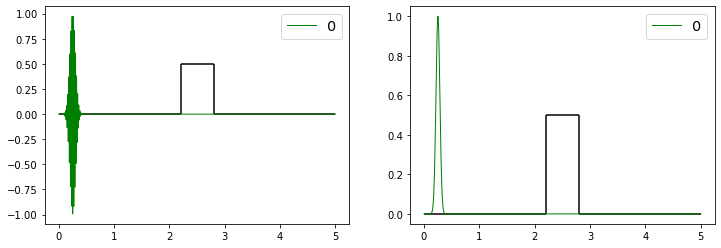

значение вф в точкe 2500 (5e-323-1e-323j)
значение вф в точкe 500 (0.03891211300347015-0.020170211961575476j)
значение вф в точкe 100 (-5.2813299708834205e-08+1.0102515788308823e-06j)


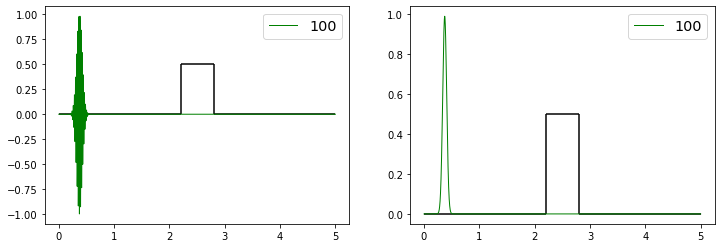

значение вф в точкe 2500 (-8.044164253708007e-252+1.2140219867818287e-252j)
значение вф в точкe 500 (-0.09398272233517542-0.9724505487924615j)
значение вф в точкe 100 (1.8217868579063257e-08+1.0747007209127579e-07j)


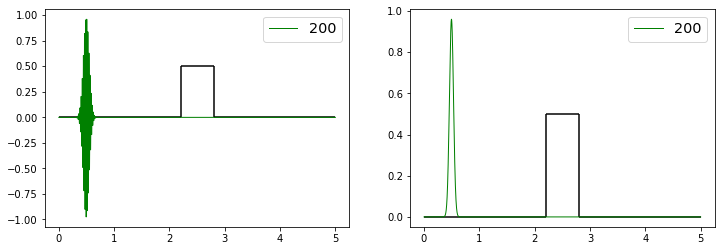

значение вф в точкe 2500 (1.3500132817463692e-195+7.534119911925199e-195j)
значение вф в точкe 500 (0.018799171899457456-0.0884364091218813j)
значение вф в точкe 100 (1.905858729370041e-08-5.281938105911555e-08j)


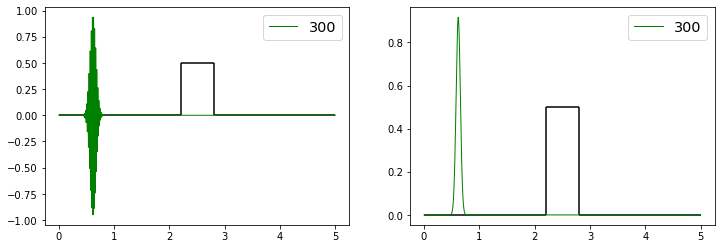

значение вф в точкe 2500 (-2.035342712268616e-150+8.749501709590555e-150j)
значение вф в точкe 500 (-7.120698690495874e-05+0.0001446224236085954j)
значение вф в точкe 100 (2.942860740509279e-09-2.8852534808335546e-08j)


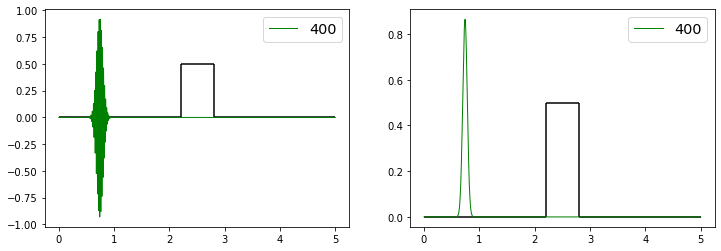

значение вф в точкe 2500 (3.2157048823873296e-113+4.740258637544585e-114j)
значение вф в точкe 500 (-9.862442406536277e-08+2.947944677655685e-07j)
значение вф в точкe 100 (-2.0860526826740065e-08-1.0681739412860597e-09j)


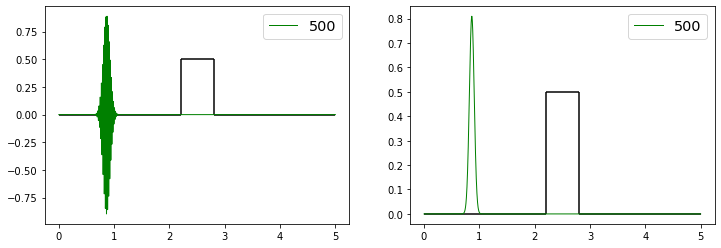

значение вф в точкe 2500 (1.2757286262770312e-82-7.514946556273492e-82j)
значение вф в точкe 500 (-1.2655153338467234e-07-8.268908122484673e-08j)
значение вф в точкe 100 (-1.3292885838984237e-08-1.684824909605237e-08j)


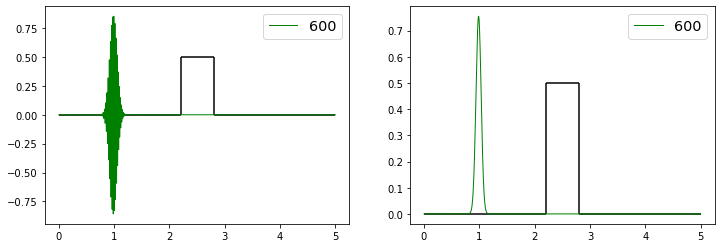

значение вф в точкe 2500 (1.8564166149558163e-58+9.150445556124614e-58j)
значение вф в точкe 500 (-1.119630514572537e-07+1.0846127476476656e-07j)
значение вф в точкe 100 (-3.169883908436964e-08+1.3300173936865257e-08j)


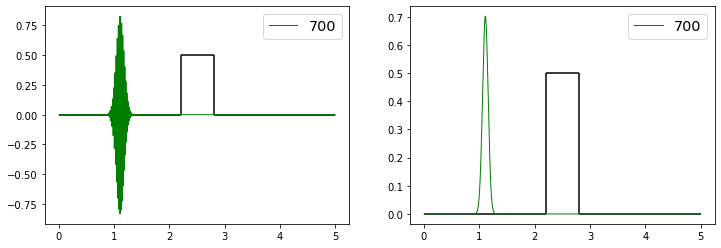

значение вф в точкe 2500 (-5.606808992444019e-39-4.966960673823954e-39j)
значение вф в точкe 500 (-7.7644904797451e-08+1.0734146745861458e-08j)
значение вф в точкe 100 (-2.125120862521842e-08-6.160482043555215e-09j)


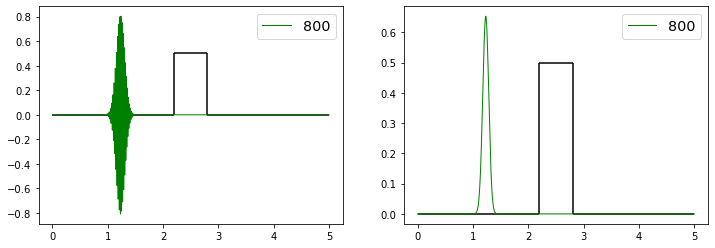

значение вф в точкe 2500 (1.3990421802634305e-25-8.902396101174743e-26j)
значение вф в точкe 500 (-2.0980994120989024e-08-8.70147192423395e-08j)
значение вф в точкe 100 (-3.7008749901358098e-09+1.5272732130061206e-09j)


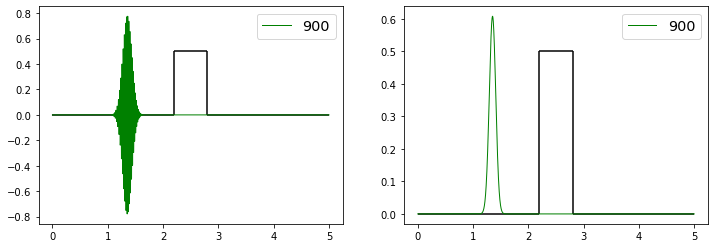

значение вф в точкe 2500 (-2.1211537041047853e-18-4.767981462552771e-18j)
значение вф в точкe 500 (2.6315316736504416e-09+5.5633083569385516e-08j)
значение вф в точкe 100 (-1.1761188480012753e-09+1.0871002886954264e-08j)


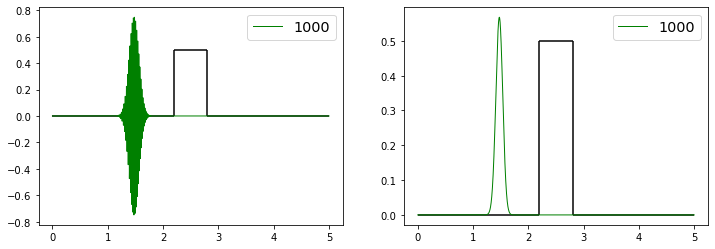

значение вф в точкe 2500 (1.1858534967919254e-15+1.0111569393052528e-15j)
значение вф в точкe 500 (1.2974117555417288e-08-4.669836814982461e-08j)
значение вф в точкe 100 (-2.5271584574823707e-09+1.4017751192346316e-08j)


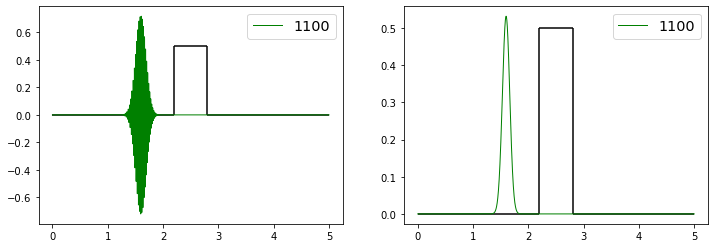

значение вф в точкe 2500 (1.3226167899354209e-07+1.701720015827114e-07j)
значение вф в точкe 500 (-2.6863199716485352e-08+5.750476778585064e-08j)
значение вф в точкe 100 (-2.9672653707390136e-09+1.4014996615553997e-08j)


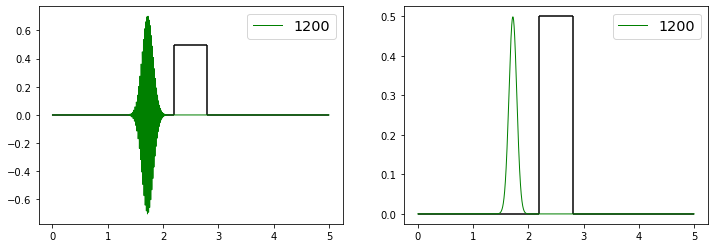

значение вф в точкe 2500 (-4.772459475651154e-09+7.635328210888447e-08j)
значение вф в точкe 500 (6.073065012675526e-08+7.799122204346126e-09j)
значение вф в точкe 100 (-2.1589838915418623e-09+1.2984332754286078e-08j)


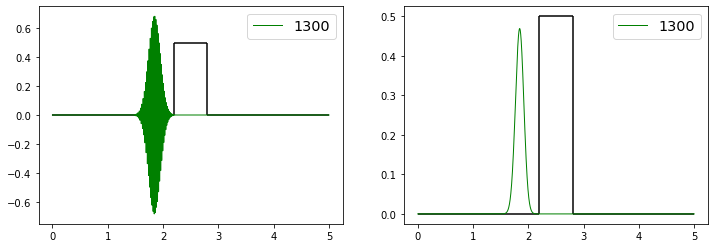

значение вф в точкe 2500 (1.8644639151936097e-07-4.1842050233199793e-07j)
значение вф в точкe 500 (-1.304794946159206e-08-3.428735294251552e-08j)
значение вф в точкe 100 (-6.33800114433767e-10+1.1480354465710733e-08j)


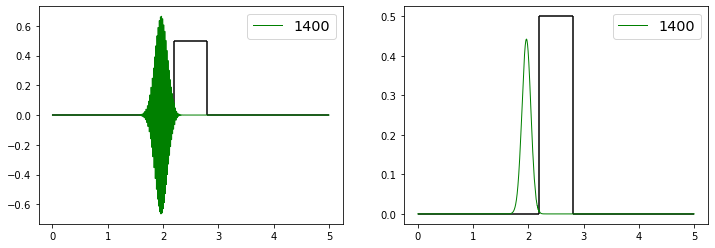

значение вф в точкe 2500 (0.00013324506449259683-7.54966839995925e-05j)
значение вф в точкe 500 (-4.1960987645793775e-08-1.943455749567045e-08j)
значение вф в точкe 100 (1.0137472688572115e-09+9.450777687085815e-09j)


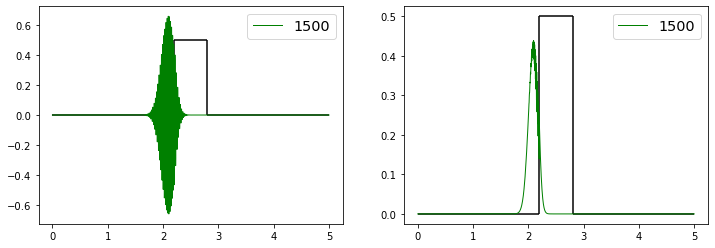

значение вф в точкe 2500 (-0.00856551123240288+0.0016267919609464446j)
значение вф в точкe 500 (-1.900687446688706e-08+1.5609153829636446e-08j)
значение вф в точкe 100 (2.1494055016371845e-09+6.856689392835924e-09j)


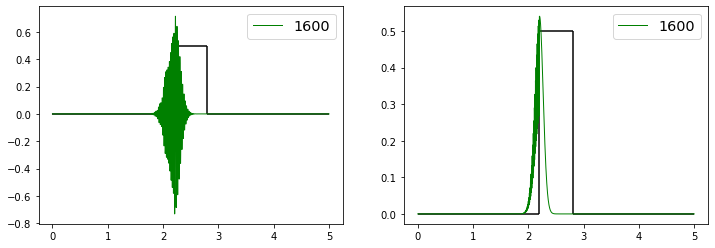

значение вф в точкe 2500 (-0.0922046356113028+0.040762111230724575j)
значение вф в точкe 500 (5.453377993708697e-09+2.1647952823021953e-08j)
значение вф в точкe 100 (2.181708155601198e-09+4.009242180815507e-09j)


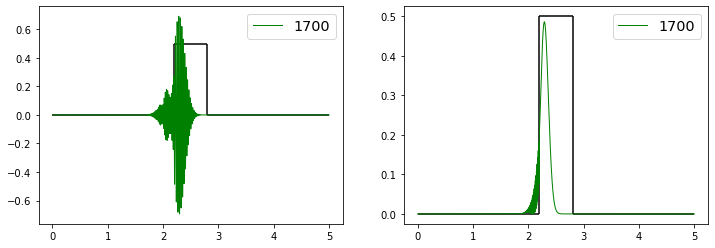

значение вф в точкe 2500 (0.026429531849697537-0.37066727052689713j)
значение вф в точкe 500 (3.4256572226687705e-08+5.374986137589615e-09j)
значение вф в точкe 100 (8.470799040928443e-10+1.643924814272746e-09j)


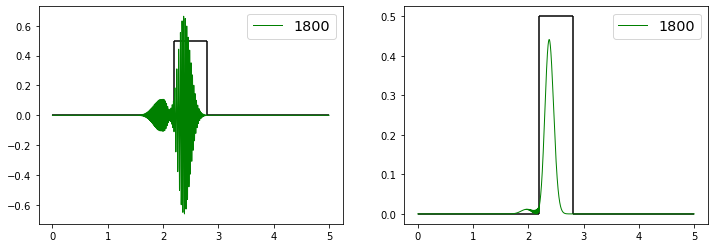

значение вф в точкe 2500 (-0.5074165793364303+0.3352615848061316j)
значение вф в точкe 500 (3.1386823145543377e-09-3.62498749714578e-08j)
значение вф в точкe 100 (-1.46787203827154e-09+6.481003196190877e-10j)


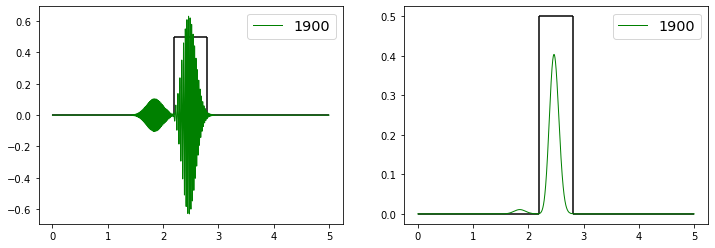

значение вф в точкe 2500 (-0.2690874094988611+0.4953838869203076j)
значение вф в точкe 500 (3.3561594971299306e-09-1.52891582142989e-08j)
значение вф в точкe 100 (-3.578678350099328e-09+1.4881669285734648e-09j)


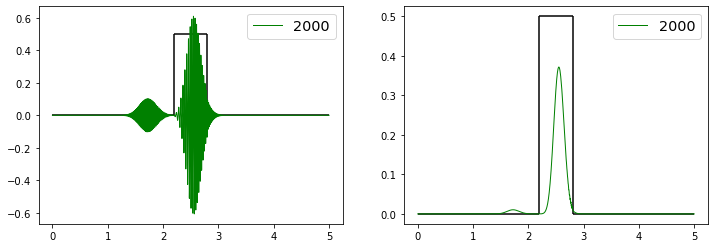

значение вф в точкe 2500 (-0.35402021981506215+0.020761991183605444j)
значение вф в точкe 500 (-2.4510456036025025e-08+5.9408042258857e-09j)
значение вф в точкe 100 (-6.838237185792439e-09+4.26400355673794e-09j)


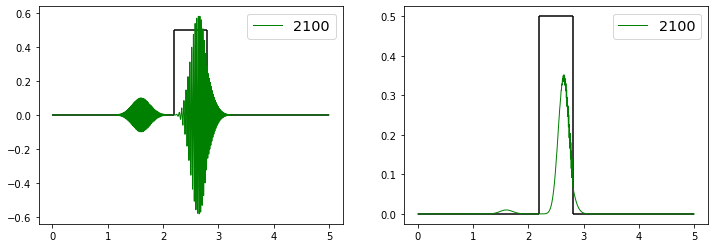

значение вф в точкe 2500 (0.10495669872890583-0.13406992106398777j)
значение вф в точкe 500 (-3.056227755416681e-08+3.7048317130433893e-09j)
значение вф в точкe 100 (-2.301121816353165e-09+5.904213987458304e-09j)


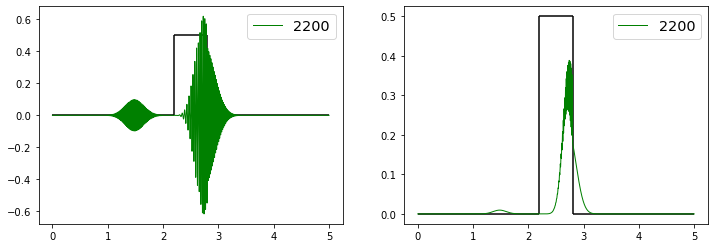

значение вф в точкe 2500 (-0.07513020647377484+0.03680253529132188j)
значение вф в точкe 500 (-1.7741228083673314e-07-4.108667365215829e-08j)
значение вф в точкe 100 (6.166805663829795e-09+9.644556218239275e-09j)


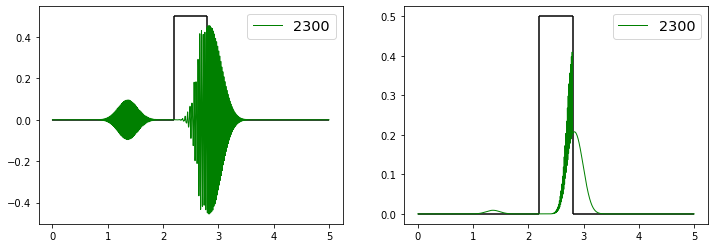

значение вф в точкe 2500 (0.052388125274100104-0.011311362764413328j)
значение вф в точкe 500 (-1.148703555808263e-05-6.890072587367232e-06j)
значение вф в точкe 100 (7.874781723570673e-09+9.926450144063824e-09j)


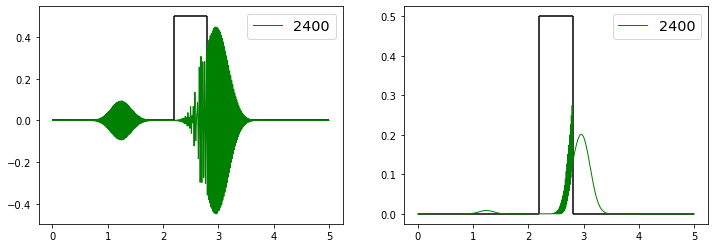

значение вф в точкe 2500 (-0.0529141730375945+0.02234407846865204j)
значение вф в точкe 500 (0.0003303200881584418+1.2003182764211282e-05j)
значение вф в точкe 100 (8.230306377569338e-09+1.578924539581526e-08j)


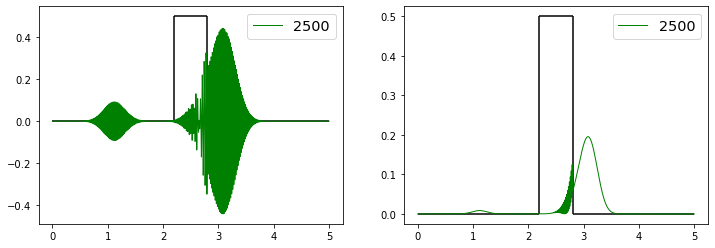

значение вф в точкe 2500 (0.03474328056005099+0.07638467406434771j)
значение вф в точкe 500 (0.000413490206553083-0.003229987081545386j)
значение вф в точкe 100 (8.978326489406666e-07+4.3543276706623115e-07j)


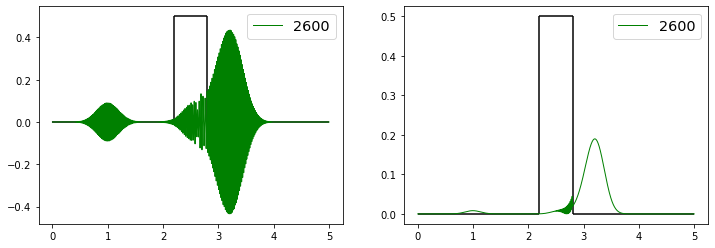

значение вф в точкe 2500 (0.06456265903538816+0.05789537318081819j)
значение вф в точкe 500 (0.008749005924479658-0.012867121979601806j)
значение вф в точкe 100 (5.9719338108734045e-06+3.6033330497425216e-05j)


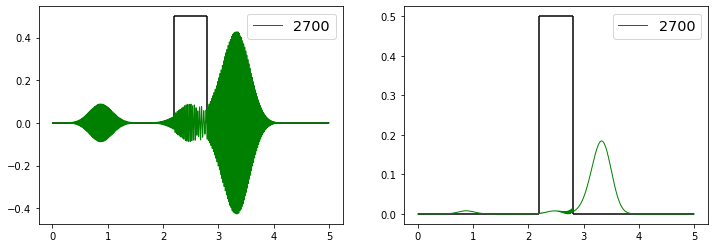

значение вф в точкe 2500 (0.020702123698820594+0.07109760716639968j)
значение вф в точкe 500 (0.013189988449442648+0.03977962501648998j)
значение вф в точкe 100 (-0.0001179234135819951-0.0005228070656618498j)


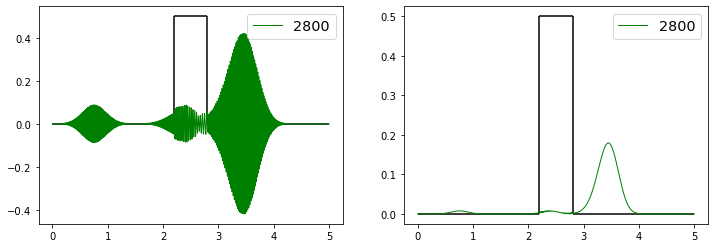

значение вф в точкe 2500 (-0.05133641188211187+0.02272137282213446j)
значение вф в точкe 500 (0.024112053010428937-0.06733284659244823j)
значение вф в точкe 100 (-0.0037050434284317153-0.0006755523542505844j)


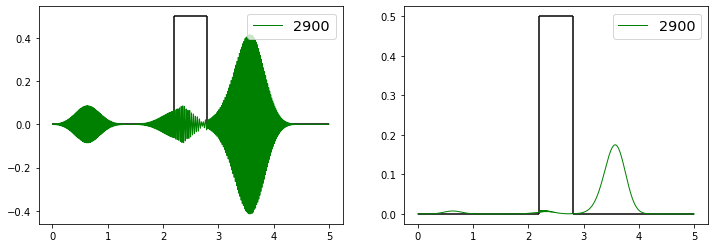

значение вф в точкe 2500 (0.010115878515405994-0.03749739624550065j)
значение вф в точкe 500 (-0.054945828057223596-0.06454190172656947j)
значение вф в точкe 100 (-0.012899529807823664-0.009775984078202722j)


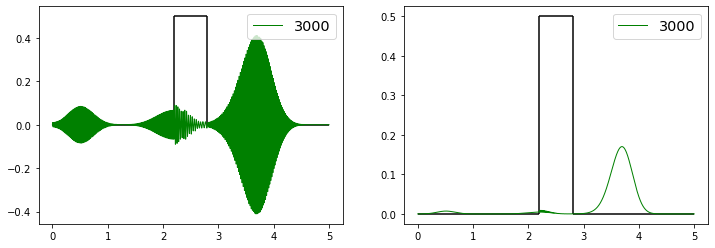

значение вф в точкe 2500 (-0.002893624050615877+0.022676193448129114j)
значение вф в точкe 500 (-0.033354598808109634-0.06718383478592242j)
значение вф в точкe 100 (0.030240158410605043-0.009680621358146587j)


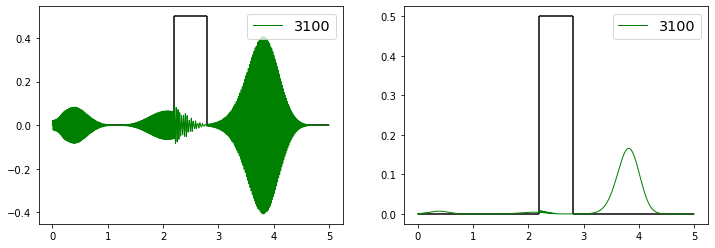

значение вф в точкe 2500 (0.002753621940298417-0.0066873158543449855j)
значение вф в точкe 500 (0.04274646670746335-0.030278898490875315j)
значение вф в точкe 100 (-0.06987259956310483-0.027613549226517573j)


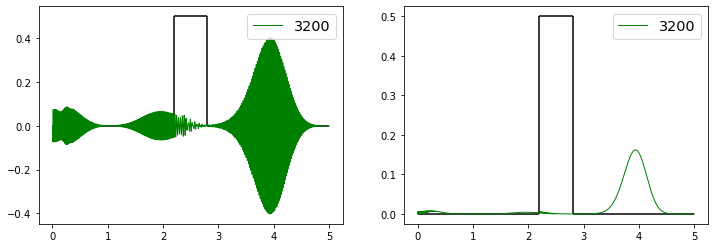

значение вф в точкe 2500 (0.0026451280252464257+0.010599137073336854j)
значение вф в точкe 500 (-0.009103308004370115+0.030681043241012586j)
значение вф в точкe 100 (-0.007668386453760004+0.10044437959918788j)


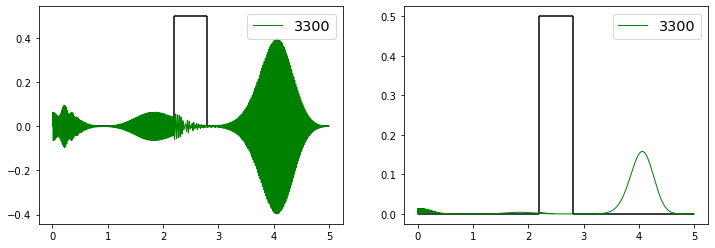

значение вф в точкe 2500 (0.01897475847357862+0.0035708259414041267j)
значение вф в точкe 500 (0.009706082604489455-0.006272763666694638j)
значение вф в точкe 100 (-0.003136025806803894+0.024490385168678117j)


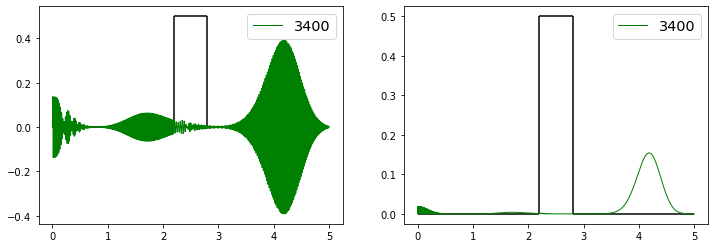

значение вф в точкe 2500 (0.016964590428810038-0.0005429353128479058j)
значение вф в точкe 500 (-0.02221356564614475+0.0034939606972641023j)
значение вф в точкe 100 (-0.08861012738363044-0.029095729278644216j)


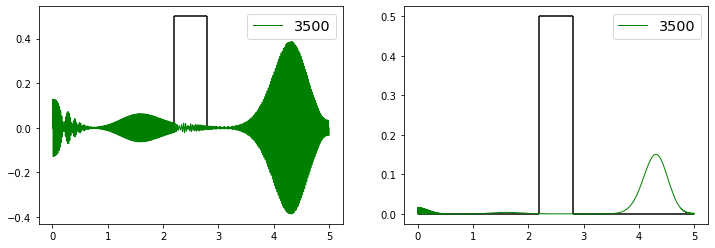

значение вф в точкe 2500 (0.004827283379378575+0.00855031822112886j)
значение вф в точкe 500 (0.02184003099152896-0.020200538898050163j)
значение вф в точкe 100 (-0.01601250323641258-0.09050518218887556j)


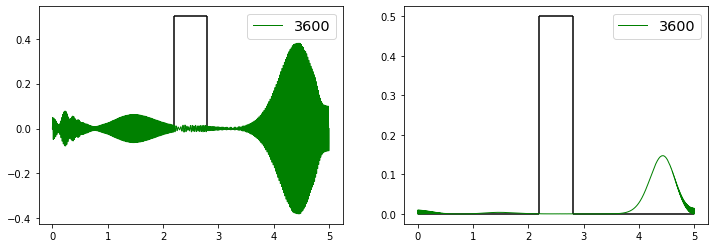

значение вф в точкe 2500 (-0.011128256244557096+0.002433103521572543j)
значение вф в точкe 500 (-0.05066500074769181-0.003699931489632663j)
значение вф в точкe 100 (0.03655993646432043-0.0024377246777174465j)


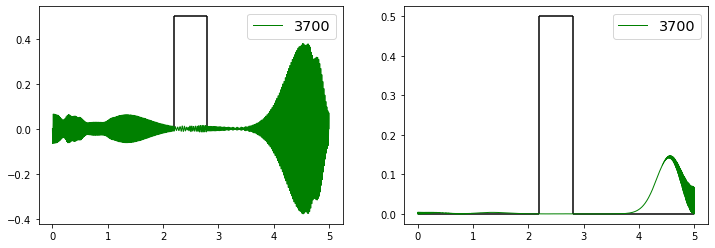

значение вф в точкe 2500 (-0.0013440487615705861-0.007680031490553105j)
значение вф в точкe 500 (-0.03517890051513744+0.04951041076371486j)
значение вф в точкe 100 (0.005798805066882993+0.01587795776274913j)


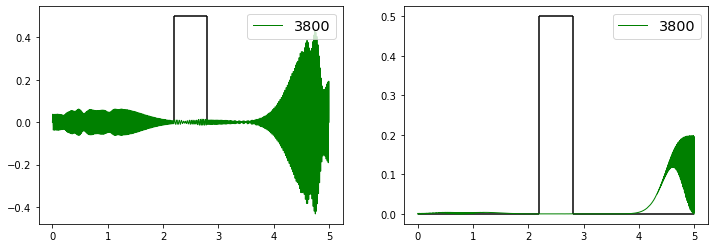

значение вф в точкe 2500 (0.004349680453567007+0.00593088473544131j)
значение вф в точкe 500 (-0.027942217823183013+0.03593478654459378j)
значение вф в точкe 100 (-0.007675302588974443-0.016483187382115086j)


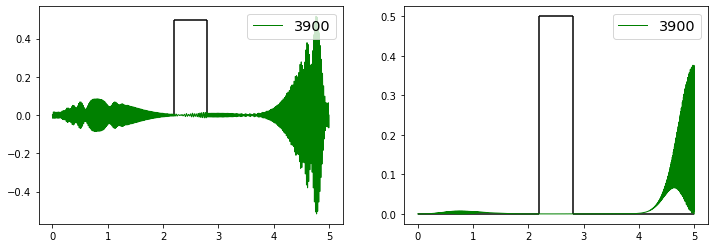

значение вф в точкe 2500 (-0.002699728234189745-0.006048653142267689j)
значение вф в точкe 500 (-0.016653482227532802+0.018929575364744343j)
значение вф в точкe 100 (-0.0066324398242838326+0.011560683517047853j)


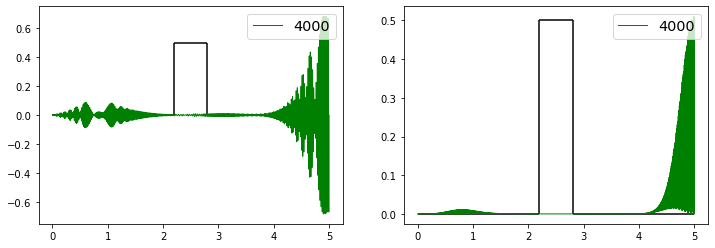

значение вф в точкe 2500 (0.0017591865776086376+0.0014380884039466551j)
значение вф в точкe 500 (-0.04214428186507479-0.04012203126803949j)
значение вф в точкe 100 (0.003295364232683919+0.011918087177851998j)


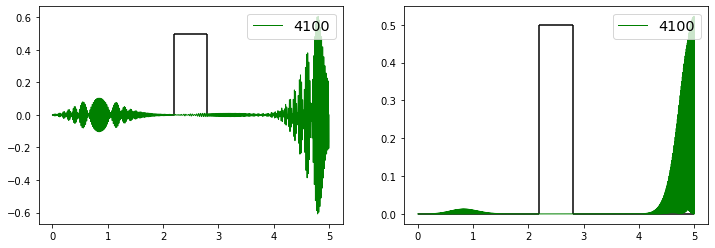

In [43]:
#создание массива e
e = np.zeros(J, dtype = np.complex128)
N = 4200
#объявление массива е
for j in range(J):
    if j == 0:
        e[j] = 2 + eps ** 2 * V[j] - 1j*lyambda
    else:
        e[j] = 2 + eps ** 2 * V[j] - 1j*lyambda - 1/e[j-1]
#print(e[0], e[1], e[2], e[100], e[500], e[700])
f = np.zeros(J, dtype = np.complex128)
omega = np.zeros(J, dtype = np.complex128)
#n - временные итерации, j - пространственные
for n in range(N):
    # формирование массива e и f для шага n
    #if n % 100 == 0:
    #    print("Итерация номер ", n)
    for j in range(J):
        #формирование массива omega для случая n
        if j == 0:
            omega[j] = (1j*lyambda + eps**2*V[j] + 2)*psi[j] - psi[j + 1]
        elif j == J - 1:
            omega[j] = -psi[j - 1] + (1j*lyambda + eps**2*V[j] + 2)*psi[j]
        else:
            omega[j] = -psi[j - 1] + (1j*lyambda + eps**2*V[j] + 2)*psi[j] - psi[j + 1]
        #формирование массива f для случая n
        if j == 0:
            f[j] = omega[j]
        else:
            f[j] = omega[j] + f[j-1]/e[j-1]
        #if n % 100 == 0:
        #    print("омега для ", j, " точки = ", omega[j])
        #    print("функция f для ", j, "точки = ", f[j])
    # создание массива psi для шага n + 1(нумерация начинается с 0 и заканчивается J - 1)
    for j in reversed(range(J)):
        if j == J - 1 or j == 0:
            psi[j] = 0
        elif j == J - 2:
            psi[j] = - f[j]/e[j]
        else:
            psi[j] = (psi[j+1] - f[j])/e[j]
        if (n % 100) == 0 and ((j == 100) or (j == 500) or (j == 2500)) :
            print("значение вф в точкe", j, psi[j])
    for m in range(J):
        module_psi[m] = abs(psi[m]) ** 2
    if n % 100 == 0:
        fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,4) )
        ax1.plot(x, psi.real, linewidth=1, color='green', label = n)
        ax1.vlines(2.2, 0, 0.5, color = 'black')
        ax1.vlines(2.8, 0, 0.5, color = 'black')
        ax1.hlines(0.5, 2.2, 2.8, color = 'black')
        ax1.hlines(0, 0, 2.2, color = 'black')
        ax1.hlines(0, 2.8, 5, color = 'black')
        ax1.legend(loc = 1, fontsize = "x-large")
        ax2.plot(x, module_psi, linewidth=1, color='green', label = n)
        ax2.vlines(2.2, 0, 0.5, color = 'black')
        ax2.vlines(2.8, 0, 0.5, color = 'black')
        ax2.hlines(0.5, 2.2, 2.8, color = 'black')
        ax2.hlines(0, 0, 2.2, color = 'black')
        ax2.hlines(0, 2.8, 5, color = 'black')
        ax2.legend(loc = 1, fontsize = "x-large")
        plt.show()

In [19]:
phase_mas = np.vectorize(phase)

In [24]:
phs1 = phase_mas(psi)
print(phs1)

[0.         0.15707963 0.31415927 ... 0.         0.         0.        ]


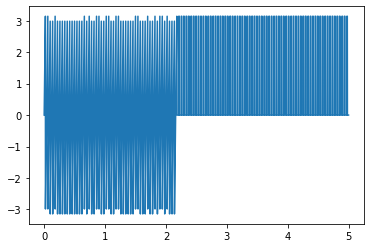

In [26]:
plt.plot(x, phs1)

In [21]:
phs2 = phase_mas(psi)
print(phs2)

[ 0.          2.20070551  1.98142917 ... -0.52912019 -0.57973002
  0.        ]


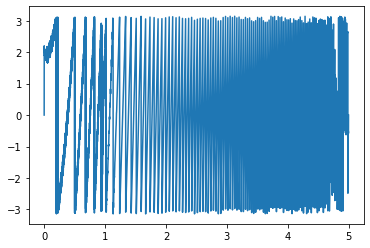

In [22]:
plt.plot(x, phs2)

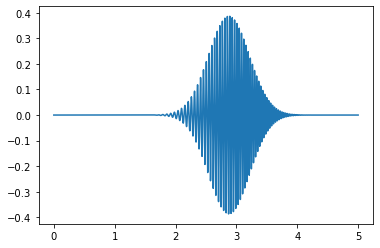

In [14]:
plt.plot(x, psi.imag)

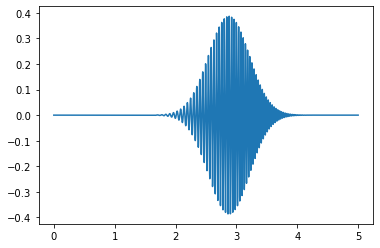

In [15]:
plt.plot(x, psi.real)

In [16]:
print(psi)

[ 0.00000000e+00+0.00000000e+00j -3.49458925e-11+4.79383537e-11j
 -5.02070449e-11+1.15316750e-10j ...  6.54640710e-08-3.82791838e-08j
  1.83758226e-08-1.20321699e-08j  0.00000000e+00+0.00000000e+00j]
